# Project: Wrangling and Analyze Data

In [1]:
# importing the relevant libraries for the project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns
import os


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
twitter_data = pd.read_json('tweet-json.txt',lines = True)


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing the "twitter_archive" df for quality and tidy issues and general checks

In [6]:
#visually assessing the twitter archive dataframe with pandas and Microsoft Excel
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
# checking for the unique sources for the tweets
twitter_archive.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#checking for duplicated entries
twitter_archive.duplicated().sum()

0

In [11]:
#checking for duplicated tweet_ids
twitter_archive.tweet_id.duplicated().sum()

0

In [12]:
#it is expected that the rating denominator is 10 for all entries. We will check if this is the reality.
rating_denominator_less_than_10 = twitter_archive.query('rating_denominator < 10')
rating_denominator_less_than_10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [13]:
# We need to see the entire "text", not truncated version.
# Referenced https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver on how to display full text

pd.set_option('display.max_colwidth', None)

In [14]:
rating_denominator_less_than_10.text

313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
2335                                     This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

The values in rating_denominator_less_than_10 return the first values that appear to conform to a pattern. Most of them are inaccurate but this is a minority and we wont clean this issue.

In [15]:
# The expectation is that people's dogs should be rated above 10. We will review entries where dogs were rated below 10
rating_numerator_less_than_10 = twitter_archive.query('rating_numerator < 10')
rating_numerator_less_than_10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [16]:
rating_numerator_less_than_10.text.head(10)

45                               This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
229    This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
315                                                     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
387                                                                                                 I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
462                          RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…
485                      RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for

***The rating for entry in index [45] is 13.5 which is different from the rating_numerator provided as 5.
It therefore has been established with the assessment above that at least one of the rating_numerator is inaccurate, and we will have to write a regex to extract values.

#### Assessing the "image_predictions" df for quality and tidy issues and general checks

In [17]:
#visually assessing the twitter archive dataframe with pandas
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
#Assessing the jpg_url of some of the entries where the p1_dog = False 
p1_confidence_check = image_predictions.query('p1_dog == False')
p1_confidence_check.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True


In [21]:
p1_confidence_check.shape

(543, 12)

**I observed from the 10 entries above that there were 3 dogs in the images. However, I will not confirm the same for the remaining 542 records. I will also focus on prediction 1 alone, and where p1_dog is True.**

#### Assessing the "twitter_data" df for quality and tidy issues and general checks

In [22]:
twitter_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http:/

In [23]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [24]:
twitter_data.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [25]:
twitter_data.id.duplicated().sum()

0

### Quality issues
Q1. twitter_achive df: The tweet_id is an integer not a string.

Q2. twitter_achive df: there are retweets and reply tweets

Q3. twitter_achive df: Timestamp is a string instead of datetime

Q4. twitter_achive df: Inaccurate rating_numerator for at least one row and rating_denominators less than 10

Q5. twitter_achive and twitter_data df: Unstructured "source" of tweet

Q6. image_predictions df: Redundant p2 and p3 prediction data and predictions for p1 where p1_dog is false.

Q7. image_predictions df: The tweet_id is an integer not a string.

Q8. twitter_data df: Irrelevant columns other than the favourite count,retweet count, and the id

Q9. twitter_archive df: Redundant columns relating to retweets and replies

Q10: image_predictions df: Some of the images dont contain dogs at all, and the predictions most times rightly state the items in the images.

Q11: image_predictiond df: Some of p1 predicitons suggest the absence of a dog, but there's a dog in the image alongside other items in the environment.

Q12: twitter_archive df: Some of the tweets don't state the lifestage of the dog.

### Tidiness issues
T1. twitter_achive df: The lifestage of the dogs is in three columns "doggo', 'pupper' and 'puppo'

T2. Tweets, which form observational units, are spread across all three datasets

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_data_clean = twitter_data.copy()

**Changing Data Types**

#### Define:
1. Change the data types of tweet_id in twitter_archive and image_predictions df to str
2. For Q3, change the timestamp in the twitter_archive df to datetiime format

#### Code

In [27]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [29]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Retweets and Replies on the twitter archive df (Resolving Q2)**

#### Define
Remove the retweets and replies on the twitter archive df by selecting only the tweet_ids that are not replies or retweets

#### Code

In [30]:
twitter_archive_clean = twitter_archive_clean[~(twitter_archive_clean.retweeted_status_id.notnull() | twitter_archive_clean.in_reply_to_status_id.notnull())]

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

As seen with the info on the cleaned twitter_archive, the retweets and the replies are no longer present.

**Inaccurate rating numerators and denominators (Q4)**

#### Define
1. Use regex to extract the correct rating numerator and denominator
2. Drop the existing rating numerator and denominator

#### Code

In [32]:
## Using a pattern to extract the fraction

regex_pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

##creating a new column for the ratings
twitter_archive_clean['ratings'] = twitter_archive_clean.text.str.extract(regex_pattern, expand= True)[0]

##creating the new numerator and denominator
twitter_archive_clean[['correct_numerator','correct_denominator']] = twitter_archive_clean.ratings.str.split('/', n = 1, expand = True)

##dropping rating_numerator, rating_denominator and ratings
twitter_archive_clean.drop(['rating_numerator','rating_denominator', 'ratings'], axis = 1, inplace= True)

#### Test

In [33]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,correct_numerator,correct_denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13,10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13,10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,12,10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,13,10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,None,None,None,None,None,5,10
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,a,None,None,None,None,6,10
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,a,None,None,None,None,9,10
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,a,None,None,None,None,7,10


*From the twitter_archive_clean df above, we have corrected the numerator and denominator and dropped the former values*

**Unstructured Source of Tweet (Q5)**

#### Define
Replace the sources of data with the format below.

- <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  with Iphone
- <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                     with Vine    
- <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                  with Web     
- <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a> with Tweetdeck


#### Code

In [34]:
twitter_archive_clean.source = twitter_archive_clean.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],['Iphone','Vine','Web','TweetDeck'])
twitter_data_clean.source = twitter_data_clean.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],['Iphone','Vine','Web','TweetDeck'])

#### Test

In [35]:
twitter_archive_clean.source.value_counts()

Iphone       1964
Vine           91
Web            31
TweetDeck      11
Name: source, dtype: int64

In [36]:
twitter_data_clean.source.value_counts()

Iphone       2219
Vine           91
Web            33
TweetDeck      11
Name: source, dtype: int64



**Lifestage of the dog in 3 columns(T1 and Q12)**




#### Define
1. Replace the None in doggo, pupper, puppo and floofer columns with an empty string
2. Combine the dog lifestages doggo, pupper and poppo into a single lifestage column. Note that 'floofer' is not a lifestage
3. Replace the resulting Lifestage entries with more precise names
4. Drop the pupper,puppo and doggo columns

#### Code

In [37]:
columns_with_None_to_be_replaced = ['pupper','puppo','doggo','floofer']
for column in columns_with_None_to_be_replaced:
    twitter_archive_clean[column].replace('None','',inplace=True)
    
#creating the lifestage column
twitter_archive_clean['Lifestage'] = twitter_archive_clean['doggo'] + ',' + twitter_archive_clean['pupper'] + ',' + twitter_archive_clean['puppo']
twitter_archive_clean['Lifestage'] = twitter_archive_clean['Lifestage'].replace([',,',',pupper,','doggo,,',',,puppo','doggo,pupper,','doggo,,puppo'],[np.nan, 'pupper','doggo','puppo','doggo,pupper','doggo,puppo'])

#replacing the empty entries in floofer with np.nan
twitter_archive_clean.floofer = twitter_archive_clean.floofer.replace('',np.nan)

#dropping the pupper,puppo and doggo columns
old_lifestage = ['pupper','puppo','doggo']
twitter_archive_clean.drop(old_lifestage,axis = 1, inplace= True)


#### Test

In [38]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,floofer,correct_numerator,correct_denominator,Lifestage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,13,10,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,13,10,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,12,10,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,13,10,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,12,10,NaN


In [39]:
twitter_archive_clean.Lifestage.value_counts()

pupper          221
doggo            73
puppo            23
doggo,pupper      9
doggo,puppo       1
Name: Lifestage, dtype: int64

**Redundant columns relating to retweets and replies (Q9)**

#### Define
Drop the redudundant columns related to retweets and replies which include:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp


#### Code

In [40]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

#### Test

In [41]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,floofer,correct_numerator,correct_denominator,Lifestage
0,892420643555336193,2017-08-01 16:23:56+00:00,Iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,13,10,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,13,10,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,12,10,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,13,10,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,12,10,NaN


**Redundant columns relating to q2 and q3 predictions (Q6)**

#### Define
1. Drop the redudundant columns related to p2 and p3 precictions in image_predicitons df which include:
- p2 and p3
- p2_conf and p3_config
- p2_dog and p3_dog

2. Select only tweets where p1_dog is True


#### Code

In [42]:
image_predictions_clean = image_predictions_clean.loc[:,'tweet_id':'p1_dog']
image_predictions_clean = image_predictions_clean.query('p1_dog == True')

#### Test

In [43]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [44]:
image_predictions_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

**Irrelevant columns in twitter data(Q8)**

#### Define
Keep only the relevant columns for our analysis which include:
1. created_at
2. id
3. retweet_count
4. favorite_count

#### Code

In [45]:
twitter_data_clean = twitter_data_clean[['created_at','id','retweet_count','favorite_count']]

#### Test

In [46]:
twitter_data_clean.head()


,created_at,id,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,6514,33819
2,2017-07-31 00:18:03+00:00,891815181378084864,4328,25461
3,2017-07-30 15:58:51+00:00,891689557279858688,8964,42908
4,2017-07-29 16:00:24+00:00,891327558926688256,9774,41048


## Merging the Dataframes (T1)

#### Define
1. Rename the id in the twitter_clean_df as tweet_id to enable us merge on the column.
2. Chnage the data type of the tweet_id in twitter_data from int to str.
2. Merge tweet_archive to image_predictions and merge the resulting df to twitter_data, and name the new df as twitter_archive_master


#### Code

In [47]:
twitter_data_clean.rename(columns = {'id':'tweet_id'}, inplace=True)
twitter_data_clean.tweet_id = twitter_data_clean.tweet_id.astype(str)
df1 = pd.merge(twitter_archive_clean,image_predictions_clean, on = 'tweet_id', how = 'inner')
twitter_archive_master = pd.merge(df1,twitter_data_clean, on = 'tweet_id', how = 'inner')

#### Test

In [48]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,name,floofer,correct_numerator,correct_denominator,Lifestage,jpg_url,img_num,p1,p1_conf,p1_dog,created_at,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,13,10,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27+00:00,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,Iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03+00:00,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,Iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,12,10,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24+00:00,9774,41048
3,891087950875897856,2017-07-29 00:08:17+00:00,Iphone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,NaN,13,10,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,2017-07-29 00:08:17+00:00,3261,20562
4,890971913173991426,2017-07-28 16:27:12+00:00,Iphone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,NaN,13,10,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,2017-07-28 16:27:12+00:00,2158,12041


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [49]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### ***Most common sources***

In [50]:
twitter_archive_master.source.value_counts()

Iphone       1437
Web            19
TweetDeck       7
Name: source, dtype: int64

***From the analysis above, I observed that most of the tweets were from "Iphones"***

### ***Most common dog breeds with above median dog prediction***

In [51]:
##number of dog breeds

twitter_archive_master.p1.nunique()

111

In [52]:
twitter_archive_master.p1_conf.describe()

count    1463.000000
mean        0.615043
std         0.260249
min         0.044333
25%         0.392932
50%         0.615741
75%         0.853345
max         0.999956
Name: p1_conf, dtype: float64

In [53]:
above_median_prediction_df = twitter_archive_master.query('p1_conf >= 0.615741')
above_median_prediction_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,floofer,correct_numerator,correct_denominator,Lifestage,jpg_url,img_num,p1,p1_conf,p1_dog,created_at,retweet_count,favorite_count
1,891815181378084864,2017-07-31 00:18:03+00:00,Iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,12,10,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03+00:00,4328,25461
8,890006608113172480,2017-07-26 00:31:25+00:00,Iphone,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,"https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1",Koda,NaN,13,10,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,2017-07-26 00:31:25+00:00,7624,31166
10,889665388333682689,2017-07-25 01:55:32+00:00,Iphone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,https://twitter.com/dog_rates/status/889665388333682689/photo/1,None,NaN,13,10,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,2017-07-25 01:55:32+00:00,8538,38818
11,889638837579907072,2017-07-25 00:10:02+00:00,Iphone,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,"https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1",Ted,NaN,12,10,NaN,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,2017-07-25 00:10:02+00:00,4735,27672
12,889531135344209921,2017-07-24 17:02:04+00:00,Iphone,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,Stuart,NaN,13,10,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,2017-07-24 17:02:04+00:00,2321,15359


In [54]:
above_median_prediction_df.p1.value_counts().head(10).reset_index(name = 'count')

,index,count
0,golden_retriever,100
1,Pembroke,59
2,Labrador_retriever,56
3,pug,38
4,Chihuahua,36
5,Samoyed,26
6,Pomeranian,25
7,French_bulldog,21
8,chow,21
9,toy_poodle,19


In [55]:
above_median_prediction_df.p1.value_counts().tail(10).reset_index(name = 'count')

,index,count
0,toy_terrier,1
1,black-and-tan_coonhound,1
2,kelpie,1
3,curly-coated_retriever,1
4,Gordon_setter,1
5,Afghan_hound,1
6,Leonberg,1
7,briard,1
8,Border_terrier,1
9,giant_schnauzer,1


### ***Dog breeds with the most and least retweets and favorites***

*Retweets*

most

In [56]:
twitter_archive_master.groupby('p1').retweet_count.sum().sort_values(ascending=False).head(10).reset_index()

,p1,retweet_count
0,golden_retriever,501225
1,Labrador_retriever,365109
2,Pembroke,280367
3,Chihuahua,219610
4,Samoyed,184922
5,French_bulldog,121782
6,chow,116361
7,Pomeranian,106518
8,cocker_spaniel,100561
9,pug,99182


least

In [57]:
twitter_archive_master.groupby('p1').retweet_count.sum().sort_values(ascending=False).tail(10).reset_index()

,p1,retweet_count
0,silky_terrier,1891
1,clumber,1885
2,Welsh_springer_spaniel,1551
3,Ibizan_hound,1293
4,Scotch_terrier,1250
5,standard_schnauzer,928
6,Brabancon_griffon,863
7,EntleBucher,706
8,Japanese_spaniel,471
9,groenendael,413


*Favourites*

most

In [58]:
twitter_archive_master.groupby('p1').favorite_count.sum().sort_values(ascending=False).head(10).reset_index()

,p1,favorite_count
0,golden_retriever,1693475
1,Labrador_retriever,1116811
2,Pembroke,994755
3,Chihuahua,673526
4,Samoyed,542991
5,French_bulldog,465738
6,chow,404241
7,pug,320223
8,cocker_spaniel,315825
9,Pomeranian,299114


least

In [59]:
twitter_archive_master.groupby('p1').favorite_count.sum().sort_values(ascending=False).tail(10).reset_index()

,p1,favorite_count
0,Tibetan_terrier,7364
1,clumber,7320
2,silky_terrier,7317
3,Scotch_terrier,3624
4,Ibizan_hound,3344
5,EntleBucher,2678
6,Brabancon_griffon,2655
7,standard_schnauzer,2046
8,groenendael,1896
9,Japanese_spaniel,1362


We can see from the analysis above that the first 7 dog breeds have the most retweets and favorites and appear in the same order. The remaining 3 dogs appear in both top 10 retweets and favorites. 
I am not a dog person myself, but I really loved the pictures of the dogs I saw especially the Pomerian breed.

### ***The lifestage of the dogs***

In [60]:
twitter_archive_master.Lifestage.value_counts()

pupper          144
doggo            49
puppo            19
doggo,pupper      7
doggo,puppo       1
Name: Lifestage, dtype: int64

We can see from the analysis above that most of the dogs were identified to be in the pupper stage

In [61]:
twitter_archive_master.floofer.value_counts()

floofer    8
Name: floofer, dtype: int64

From the analysis above, only 8 of the dogs from the cleaned dataset identified as floofers

### ***Dog rating by breed***

*By Median*

In [62]:
twitter_archive_master.correct_numerator = twitter_archive_master.correct_numerator.astype(float)
twitter_archive_master.correct_denominator = twitter_archive_master.correct_denominator.astype(float)

In [63]:
median_dog_rating_by_breed = twitter_archive_master.groupby('p1').correct_numerator.median().sort_values(ascending=False).reset_index()
median_dog_rating_by_breed.head(20)

,p1,correct_numerator
0,Afghan_hound,13.0
1,Saluki,13.0
2,Great_Pyrenees,12.0
3,Gordon_setter,12.0
4,Irish_water_spaniel,12.0
5,French_bulldog,12.0
6,Eskimo_dog,12.0
7,Leonberg,12.0
8,Pekinese,12.0
9,Pembroke,12.0


We can see from this analysis that the afghan_hound is the dog breed with the best rating. Some of the dog breeds in the top 10 favorite and retweets also appear in the top 20 breeds by rating.

In [64]:
median_dog_rating_by_breed = twitter_archive_master.groupby('p1').correct_numerator.median().sort_values(ascending=False).reset_index()
median_dog_rating_by_breed.tail(20)

,p1,correct_numerator
91,Chesapeake_Bay_retriever,10.0
92,Brabancon_griffon,10.0
93,bull_mastiff,10.0
94,Boston_bull,10.0
95,boxer,10.0
96,Saint_Bernard,10.0
97,bloodhound,10.0
98,beagle,10.0
99,Walker_hound,10.0
100,West_Highland_white_terrier,10.0


*By Max rating*

In [65]:
max_dog_rating_by_breed = twitter_archive_master.groupby('p1').correct_numerator.max().sort_values(ascending=False).reset_index()
max_dog_rating_by_breed.head(20)

,p1,correct_numerator
0,Labrador_retriever,165.0
1,soft-coated_wheaten_terrier,121.0
2,golden_retriever,99.0
3,West_Highland_white_terrier,84.0
4,Great_Pyrenees,60.0
5,Siberian_husky,50.0
6,borzoi,45.0
7,Eskimo_dog,14.0
8,standard_poodle,14.0
9,French_bulldog,14.0


Some of the most retweeted and favorite dogs also appear in the dogs with max ratings.  

In [66]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             1463 non-null   object             
 1   timestamp            1463 non-null   datetime64[ns, UTC]
 2   source               1463 non-null   object             
 3   text                 1463 non-null   object             
 4   expanded_urls        1463 non-null   object             
 5   name                 1463 non-null   object             
 6   floofer              8 non-null      object             
 7   correct_numerator    1463 non-null   float64            
 8   correct_denominator  1463 non-null   float64            
 9   Lifestage            220 non-null    object             
 10  jpg_url              1463 non-null   object             
 11  img_num              1463 non-null   int64              
 12  p1                  

### Insights:
1. Most people tweeted with an **Iphone**.

2. There are **111** unique dog breeds across the dataset.

3. For above median predictions, **the golden_retriever** is the dog that appeared the most

4. With the most retweets and favorites, the **golden_retriever and the Labrador_retriever** appear to be the most loved dog breeds by the public. It could also be because they appeared a lot.

5. With the least retweets and favourites, the **groenendael and Japanese_spaniel** appear to be the least loved dog breeds by the public.

6. Most of the dogs were **puppers**

7. **Afghan_hound and saluki breeds** have the highest median ratings.

8. The **Japanese_spaniel** has the least median rating. It is also one of the least loved dogs by the public. I also dont really like the images of the dog I have seen much.

### Visualization

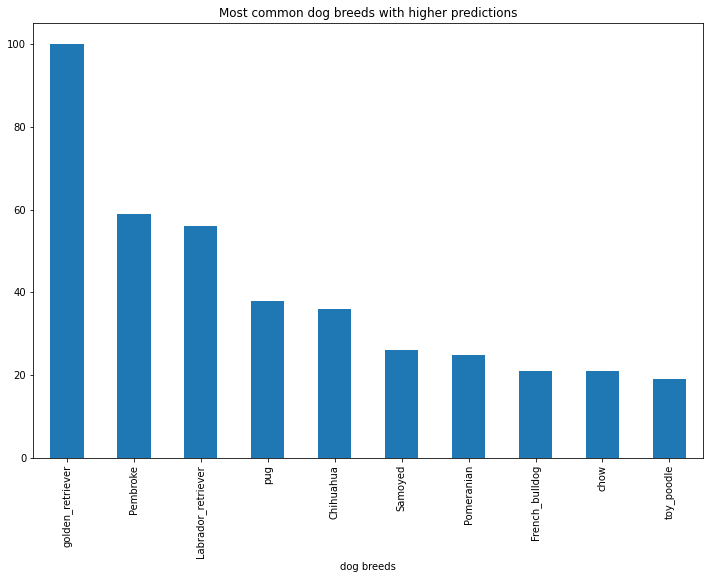

In [67]:
above_median_prediction_df.p1.value_counts().head(10).plot(kind = 'bar',figsize =(12,8))
plt.title('Most common dog breeds with higher predictions')
plt.xlabel('dog breeds');

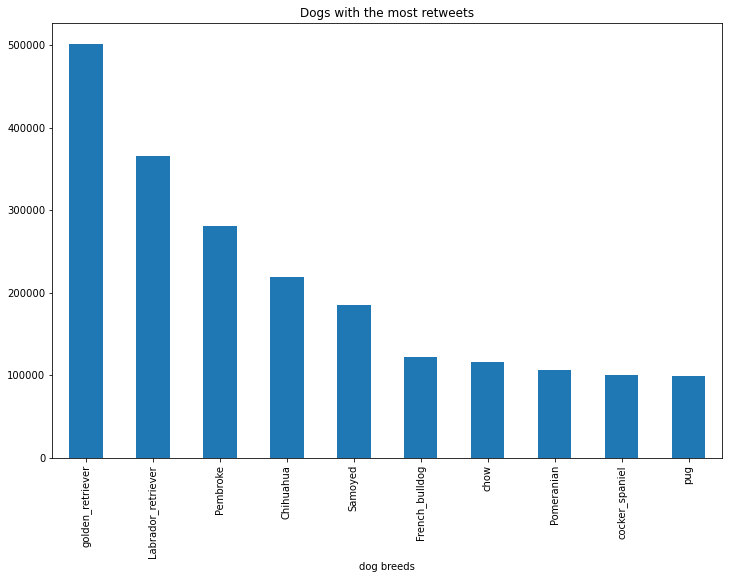

In [68]:
twitter_archive_master.groupby('p1').retweet_count.sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize = (12,8))
plt.title('Dogs with the most retweets')
plt.xlabel('dog breeds');

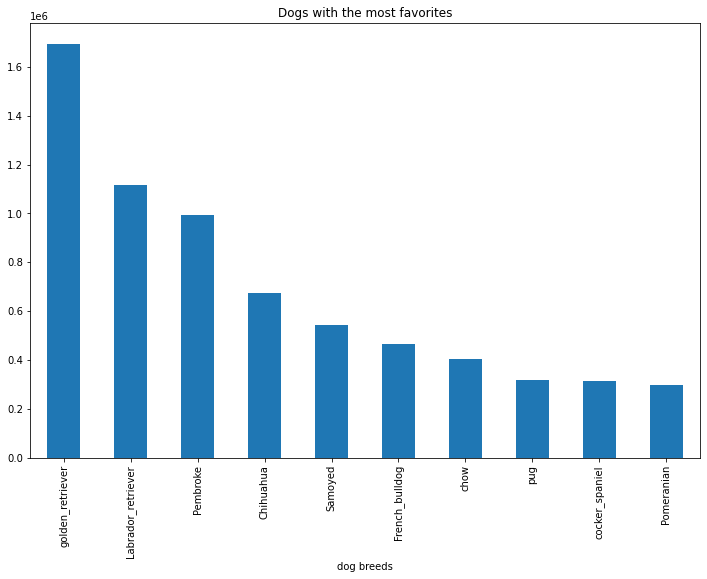

In [69]:
twitter_archive_master.groupby('p1').favorite_count.sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize = (12,8))
plt.title('Dogs with the most favorites')
plt.xlabel('dog breeds');